# Importar librerías necesarias

In [6]:
import pandas as pd  # Importa la biblioteca Pandas para trabajar con datos estructurados (manejo de tablas y DataFrames).
from sklearn.model_selection import train_test_split  # Función para dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.feature_extraction.text import CountVectorizer  # Herramienta para convertir texto en vectores de frecuencia de palabras (bolsa de palabras).
from sklearn.naive_bayes import MultinomialNB  # Modelo de clasificación basado en el algoritmo de Naive Bayes Multinomial, útil para datos categóricos como texto.
from sklearn.ensemble import RandomForestClassifier  # Implementa un modelo de clasificación basado en un conjunto de árboles de decisión (Random Forest).
from sklearn.svm import SVC  # Implementa un modelo de clasificación basado en Máquinas de Soporte Vectorial (Support Vector Machines).
from sklearn.metrics import classification_report, confusion_matrix  # Herramientas para evaluar modelos de clasificación, generan métricas y una matriz de confusión.
import matplotlib.pyplot as plt  # Biblioteca para crear gráficos y visualizar datos de manera flexible y detallada.
import seaborn as sns  # Extensión de Matplotlib para generar gráficos más atractivos y fáciles de usar, útil para análisis exploratorio.

# 1. Cargar el dataset

# 2. Verificar estructura de los datos

In [ ]:
print("Columnas del dataset:", df.columns)  # Muestra los nombres de las columnas presentes en el DataFrame cargado desde el archivo.
print("\nPrimeras filas del dataset:")  # Imprime un mensaje indicando que se mostrarán las primeras filas del DataFrame.
print(df.head())  # Muestra las primeras 5 filas del DataFrame, útil para tener una vista rápida de los datos.


# 3. Preprocesamiento: selección de columnas importantes
 Vamos a usar solo las columnas "Text" (la reseña del cliente) y "Score" (puntuación de 1 a 5)

In [ ]:
# Usar solo las columnas necesarias
df = df[['Text', 'Score']] # Filtra el DataFrame original para conservar solo las columnas 'Text' (contenido de las reseñas) y 'Score' (calificación asociada).

# 4. Creación de variable de sentimiento (positivo/negativo)
 Consideramos "positivo" si la calificación es mayor a 3, "negativo" si es menor o igual a 3

In [ ]:
# Convertir la columna Score a etiquetas binarias (1: Positivo, 0: Negativo)
# Asumimos que Score >= 3 es positivo, y Score < 3 es negativo
df['sentiment'] = df['Score'].apply(lambda x: 1 if x >= 3 else 0)

# Separar características y etiquetas
X = df['Text']
y = df['sentiment']


# 5. Exploración de datos: distribución de sentimientos

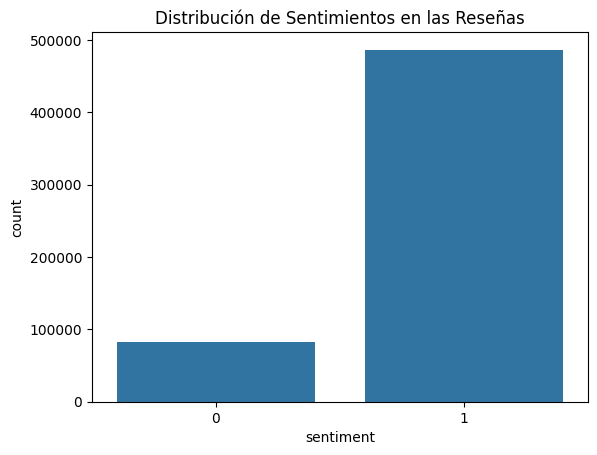

In [ ]:
sns.countplot(data=df, x='sentiment')  # Crea un gráfico de barras utilizando Seaborn para mostrar la cantidad de reseñas por cada categoría de sentimiento ('sentiment').
plt.title("Distribución de Sentimientos en las Reseñas")  # Añade un título descriptivo al gráfico.
plt.show()  # Muestra el gráfico generado.


# 6. División de los datos en entrenamiento y prueba

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# Divide los datos en conjuntos de entrenamiento y prueba.
# - X: Variables independientes (datos de entrada).
# - y: Variable dependiente (etiquetas o clases).
# - test_size=0.25: Asigna el 25% de los datos al conjunto de prueba y el 75% al de entrenamiento.
# - random_state=42: Fija una semilla para asegurar la reproducibilidad de los resultados.
# - stratify=y: Asegura que la proporción de clases en los conjuntos de entrenamiento y prueba sea la misma que en los datos originales.


# 7. Vectorización de texto (transformación a vectores de palabras)

In [ ]:
# Vectorizar los datos
vectorizer = CountVectorizer()
# Crea una instancia de CountVectorizer, una herramienta para convertir texto en una representación numérica basada en la frecuencia de palabras (bolsa de palabras).
X_train_vec = vectorizer.fit_transform(X_train)
# Ajusta el vectorizador al conjunto de entrenamiento (X_train) y lo transforma en una matriz dispersa de características basada en la frecuencia de palabras.
X_test_vec = vectorizer.transform(X_test)
# Transforma el conjunto de prueba (X_test) utilizando el vectorizador ajustado al conjunto de entrenamiento, garantizando consistencia en las características.



# 8. Entrenamiento de un modelo de Naive Bayes para análisis de sentimiento

In [ ]:
# Modelos a evaluar

models = {
    "Naive Bayes": MultinomialNB(),
    # Define el modelo Naive Bayes Multinomial, adecuado para datos categóricos como texto.
    "Random Forest": RandomForestClassifier(random_state=42),
    # Define el modelo Random Forest, que utiliza múltiples árboles de decisión para clasificación.
    # Se establece `random_state=42` para garantizar resultados reproducibles.
    "SVM": SVC(kernel='linear', random_state=42)
    # Define el modelo SVM (Máquinas de Soporte Vectorial) con un kernel lineal.
    # `random_state=42` asegura reproducibilidad en operaciones aleatorias internas.
}


# 9. Evaluación del modelo
# Ejemplo de predicción


Resultados para Naive Bayes:

Matriz de Confusión:


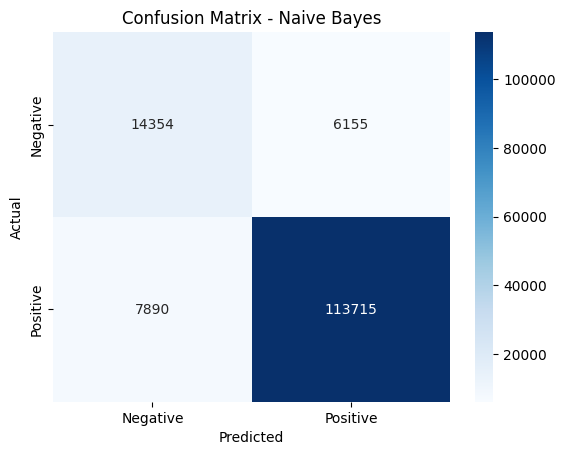


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67     20509
           1       0.95      0.94      0.94    121605

    accuracy                           0.90    142114
   macro avg       0.80      0.82      0.81    142114
weighted avg       0.90      0.90      0.90    142114


------------------------------------------------------------

Ejemplo de predicción con Naive Bayes:
Review: I absolutely love this product!
Predicted Sentiment: Positive

Review: The worst experience I have ever had.
Predicted Sentiment: Negative

Review: Good value for the money.
Predicted Sentiment: Positive

Review: Terrible quality and disappointing service.
Predicted Sentiment: Negative



In [ ]:
# Evaluar cada modelo
for model_name, model in models.items():
    # Itera sobre cada modelo definido en el diccionario `models`.

    # Entrenar el modelo
    model.fit(X_train_vec, y_train)
    # Ajusta el modelo utilizando el conjunto de entrenamiento vectorizado y las etiquetas correspondientes.

    # Predecir
    y_pred = model.predict(X_test_vec)
    # Genera predicciones para el conjunto de prueba utilizando el modelo entrenado.

    # Mostrar métricas
    print(f"\nResultados para {model_name}:\n")
    # Muestra el nombre del modelo que está siendo evaluado.

    print("Matriz de Confusión:")
    # Indica que se presentará la matriz de confusión del modelo.

    cm = confusion_matrix(y_test, y_pred)
    # Calcula la matriz de confusión comparando las etiquetas reales (`y_test`) con las predicciones (`y_pred`).

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    # Crea un mapa de calor de la matriz de confusión con anotaciones y etiquetas para facilitar la interpretación.

    plt.xlabel("Predicted")  # Etiqueta para el eje X indicando las predicciones del modelo.
    plt.ylabel("Actual")  # Etiqueta para el eje Y indicando las etiquetas reales.
    plt.title(f"Confusion Matrix - {model_name}")  # Añade un título específico para la matriz de confusión del modelo actual.
    plt.show()  # Muestra el gráfico generado.

    print("\nReporte de Clasificación:")
    # Indica que se presentará el informe de clasificación.

    print(classification_report(y_test, y_pred))
    # Muestra métricas como precisión, recall y F1-score para cada clase.

    print("\n" + "-"*60 + "\n")
    # Imprime una línea separadora para facilitar la legibilidad entre resultados de modelos.

    # Ejemplo de predicciones
    print(f"Ejemplo de predicción con {model_name}:")
    # Introduce una sección con ejemplos de predicciones del modelo actual.

    example_reviews = [
        # Define una lista de reseñas de ejemplo para probar las predicciones del modelo.
        "I absolutely love this product!",
        "The worst experience I have ever had.",
        "Good value for the money.",
        "Terrible quality and disappointing service."
    ]

    # Vectorizar ejemplos
    example_reviews_vec = vectorizer.transform(example_reviews)
    # Transforma las reseñas de ejemplo en vectores utilizando el vectorizador ajustado.

    # Predecir
    predictions = model.predict(example_reviews_vec)
    # Genera predicciones para las reseñas de ejemplo utilizando el modelo actual.

    for review, pred in zip(example_reviews, predictions):
        # Itera sobre las reseñas de ejemplo y sus predicciones correspondientes.

        sentiment = "Positive" if pred == 1 else "Negative"
        # Asigna una etiqueta de sentimiento (positivo o negativo) basada en la predicción.

        print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")
        # Muestra la reseña original y el sentimiento predicho por el modelo.
